# TRABAJO PRACTICO FINAL PROGRAMACION ORIENTADA A OBJETOS

## INTRODUCCION

### **Bases de datos**:

Precios claros es un conjunto de datasets realizado a partir de los precios provistos por el gobierno de los productos en las distintas cadenas de supermercados. Este parte de la iniciativa de la Dirección Nacional de Defensa del Consumidor de que los consumidores cuenten con mayor información a la hora de tomar decisiones con respecto a los productos que adquieren. Particularmente estos dataset pertenecen al año 2020, lo cual es importante tener en consideracion a la hora de mirar los precios dada su elevada diferencia con la actualidad.

La base de datos seleccionada cuenta con 6 datasets: uno de productos, uno con las sucursales y 3 con los precios de abril en distintos periodos, los cuales fueron relevados de la página del gobierno mediante técnicas de scraping por Open Data Córdoba, y por otro lado uno adicional que contiene las provincias y codigos de las mismas.

**Link**: <https://www.kaggle.com/datasets/tinnqn/precios-claros-precios-de-argentina?select=sucursales.csv>

### **Variables:**
A continuacion se da una breve definicion de cada variable en el dataset precios claros, el cual se utilizara a lo largo de toda la investigacion.

**Producto**
- `id` , `productos_id`: numero de identificacion del producto.
- `categoria`: categoria del producto (nuestros productos son los que forman parte de la canasta basica: Agua, Leche, Arroz, Harinas y Pastas).
- `marca`: marca del producto.
- `presentacion`: presentacion del producto en cantidad (numeros).
- `unidad_presentacion`: unidad de medida de la presentacion (cc, lt, kg o gr).
- `precio`: precio del producto en el 2020.

**Sucursal/Comercio**
- `sucursal_id`: numero de identificacion de la sucursal del producto.
- `sucursalTipo` , `tipo_comercio`: tipo de comercio de la sucursal (Supermercado, Hipermercado o Autoservicio).
- `cadena`: es la cadena de supermercado en la que se vende el producto. Este es el target de nuestro modelo, por ello seleccionamos 3 cadenas con distintas categorias: Disco dirigido a personas de alto poder adquisitivo, que es de alta categoria, Hipermercado Carrefour a personas poder adquisitivo medio y Supermercados DIA de menor poder adquisitivo).


**Variable dependiente ->** es el target mencionado, el cual depende del resto de variables: `cadena`
**Variables independientes ->** son las variables que nos van a permitir predecir el target, es decir, todo el resto de variables mencionadas: `categoria`, `marca`, `presentacion`, `unidad_presentacion`, `precio` y `tipo_comercio`.

### **Objetivo:**
El objetivo de este trabajo es poder analizar los precios de los diferentes tipos de productos de la canasta basica, teniendo en cuenta la categoria, marca, tipo de cadena, presentacion y cadena en el que se realiza la venta del producto, para poder evaluar en que comercios y que marcas tienen los productos mas baratos.

Ademas, la idea es crear un modelo de regresion logistica que nos permita predecir en base a las variables a cual cadena pertenece el producto, ya sea Disco, Hipermercado Carrefour o Supermercados DIA. Dado que pertenecen a diferentes categorias de supermercados, sus consumidores objetivo son distintos, por lo que sus precios tambien varian.

Es por eso que el objetivo del modelo es predecir a cual de ellos pertenece el producto.

### **Hipotesis:**
Respecto a las variables seleccionadas se espera poder ver que en el comercio de Disco, dado que es una cadena dirigido a personas de alto poder adquisitivo, sus productos tambien tendran mayores precios. Lo mismo sucedera son Supermercados DIA que al ser una cadena dirigida a consumidores de menor poder adquisitivo que los anteriores, se espera encontrar que sus precios tambien son menores, mientras que en Carrefour se espera encontrar un precio intermedio que en los dos anteriores.

### **Tranformaciones a realizar:**
- **Load & Merge**
En primera instancia se van a cargar todos los datasets, para luego poder unirlos y filtrarlos segun los datos necesarios para el analisi, en este caso, las categorias de productos de canasta basica: Agua, Leche, Arroz, Harinas y Pastas, y la cadena de comercio: Disco, Hipermercado Carrefour y Supermercados Dia. Ademas, como para nuestro modelo necesitamos la columna de presentacion separado de la unidad en la que esta medido, separaremos la columna en esta instancia. El dataframe resultante es el que sera utilizado para el trabajo, el cual se llamara `precios_claros`.


- **Preprocesamiento**
Una vez listo el dataset es necesario realizar un preprocesamiento de los datos. En esta instancia se evaluaran los posibles nulos en nuestras variables realizar el tratamiento adecuado de los mismos (drop, imputer, etc), y se evaluaran tambien los podibles duplicados y outliers.

- **Analisis Inicial**
Se muestar un analisis de nuestros datos, evaluando tendencias, frequencias, etc, con el objetivo de tener un mejor conocimiento de los datos a tratar.

- **Escalado**
Se escalan las variables numericas `precio` y `presentacion` para que sean comparables entre si, a pesar de que su rango de datos en primera instancia sea distinto.

- **Encoding**
Se tratan las variables categorias, creando distintas columnas binarias con la presencia o no de la variable en el producto. Esto es fundamental para el modelo bucado. Ademas, aplicamos el encoding a la variable target.

- **Modelo**
Realizamos el primer modelo de regresion logistica y obtenemos un score mediante un cross validation, el cual se irá mejorando mediante diferentes métodos para lograr un accuracy mas elevado. Haremos una matriz de confusion y veremos accuracy, precision y recall.
Ademas haremos la prediccion de una instancia que no existe para probarlo.

In [1]:
%load_ext autoreload
%autoreload 2

Importamos las librerias que vamos a necesitar.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 1 - LOAD & MERGE

In [3]:
import os
files = [f for f in os.listdir("data/") if f.endswith(".csv")]
print(files)

['productos_categoria.csv', 'clean_precios_claros.csv', 'precios_20200426_20200426.csv', 'precios_20200412_20200413.csv', 'sucursales.csv', 'precios_20200419_20200419.csv']


In [4]:
from load_csv_tp import load_all_data
data = load_all_data("data/")
data.keys()

dict_keys(['productos_categoria', 'clean_precios_claros', 'precios_20200426_20200426', 'precios_20200412_20200413', 'sucursales', 'precios_20200419_20200419'])

Asigno los datasets en variables haciendole una copia para no sobreescribir el original.

### Sucursales

In [5]:
sucursales = data['sucursales'].copy()
sucursales.head()

,id,comercioId,banderaId,banderaDescripcion,comercioRazonSocial,provincia,localidad,direccion,lat,lng,sucursalNombre,sucursalTipo
0,1-1-7,1,1,Super MAMI,Dinosaurio S.A.,AR-X,SALSIPUEDES,E53 1011 None,-31.126667,-64.295250,Super Mami 4,Hipermercado
1,10-1-1,10,1,Hipermercado Carrefour,INC S.A.,AR-B,San Isidro,Bernardo De Irigoyen 2647,-34.491345,-58.589025,San Isidro,Hipermercado
2,10-1-10,10,1,Hipermercado Carrefour,INC S.A.,AR-B,Hurlingham,Av. Vergara 1910,-34.620610,-58.633769,Villa Tesei,Hipermercado
3,10-1-11,10,1,Hipermercado Carrefour,INC S.A.,AR-B,Malvinas Argentinas,Av. Arturo Illia 3770,-34.528883,-58.701631,Malvinas Argentinas,Hipermercado
4,10-1-112,10,1,Hipermercado Carrefour,INC S.A.,AR-A,Salta,20 De Febrero 37,-24.789072,-65.413699,Salta,Hipermercado


### Productos

In [6]:
productos = data['productos_categoria'].copy()
productos.head()

,_id/$oid,nombre,categoria,marca,presentacion,id
0,5cbc69be7af152186c0cd784,Aceite de Girasol Cañuelas 1.5 Lt,Aceite,CAÑUELAS,1.5 lt,7792180001665
1,5cbc69be7af152186c0cd783,Aceite de Girasol Cañuelas 900 Cc,Aceite,CAÑUELAS,900.0 cc,7792180001641
2,5cbc69be7af152186c0cd54d,Aceite de Girasol Cocinero 1.5 Lt,Aceite,COCINERO,1.5 lt,7790060023684
3,5cbc69be7af152186c0cd552,Aceite de Girasol Cocinero 900 Ml,Aceite,COCINERO,900.0 ml,7790070012050
4,5cbc69be7af152186c0cd5e4,Aceite de Girasol Natura 1.5 Lt,Aceite,NATURA,1.5 lt,7790272001029


### Precios
Cargo los datasets de los precios de abril . Como se contaba con varios datasets del mes, se opto por concatenarlos uno debajo del otro para poder tratar los datos y realizar el analisis.

In [7]:
precios = pd.concat([data['precios_20200412_20200413'].copy(), data['precios_20200419_20200419'].copy(), data['precios_20200426_20200426']])
precios.head()

,precio,producto_id,sucursal_id
0,29.90,0000000001663,2-1-014
1,29.90,0000000002288,2-1-032
2,39.90,0000000002288,2-1-096
3,499.99,0000000205870,9-1-686
4,519.99,0000000205870,9-2-248


### - Merge
Unimos los distintos dataset para pooder realizar el analisis.

Para poder realizarlo en primer lugar voy a establecer como indice de los dataframes los id, con el objetivo de que al unirlo las columnas no se repitan. Y pasamos la columna id de productos a tipo objeto para poder unirla con precios.

In [8]:
precios = precios.set_index("producto_id")
sucursales = sucursales.set_index('id')

**Filtrado de productos**

Ademas, para no unir datos que no seran utilizados, en primera instancia filtraremos el dataset de productos para quedarnos unicamente con los lacteos.

In [9]:
list[productos.categoria.unique()]

list[array(['Aceite', 'Aceite de oliva', 'Aderezos', 'Agua', 'Arroz',
       'Bebes y niños', 'Bebidas con alcohol', 'Bebidas sin alcohol',
       'Bebidas deportivas', 'Jugos en polvo', 'Cacao y café',
       'Carnes congeladas', 'Otros congelados', 'Conservas',
       'Endulzantes', 'Especias', 'Golosinas', 'Grasas', 'Harinas',
       'Infusiones', 'Lacteos', 'Leche', 'Leche en polvo', 'Limpieza',
       'Manteca', 'Mascotas', 'Mermeladas y dulces',
       'Cereales azucarados', 'Panificados', nan, 'Pastas', 'Perfumeria',
       'Postres y reposteria', 'Premezclas', 'Quesos', 'Salsas', 'Sopas',
       'Verduras congeladas', 'Yogur'], dtype=object)]

Vemos las categorias que tiene nuestro dataset, ya que para el analisis buscabamos analizar los productos de la canasta basica. Al visualizar las diferentes categorias se observa que una de ellas pertenece a NANS. Antes de filtrar el dataset analizaremos estso NANS para ver si son relevantes para el trabajo.

In [10]:
productos[productos.categoria.isna()]

,_id/$oid,nombre,categoria,marca,presentacion,id
706,5cbc69be7af152186c0cd637,Mix de Frutos Secos y Semillas Nutritivo Natur...,NaN,ARCOR,27.0 gr,7790580110413
994,5cbc69be7af152186c0cd868,Crema de Avellana con Cacao Nutella 140 Gr,NaN,NUTELLA,140.0 gr,7898024395232


Como este producto no son parte de la canasta basica, no es relevante que falte su categoria, ya que no vamos a utilizarlo para el analisis. Podemos ignorarlo o eliminarlo. Optaremos por eliminarlo.

In [11]:
productos = productos.dropna(subset = "categoria")
productos.isna().sum()

_id/$oid        0
nombre          0
categoria       0
marca           0
presentacion    0
id              0
dtype: int64

Una vez eliminados, filtraremos por las categorias pertenecientes a la canasta basica.

In [12]:
canasta_basica = ["Agua", "Leche" , "Arroz", "Harinas", "Pastas"]

productos = productos[(productos.categoria.isin(canasta_basica))]
productos.head()

,_id/$oid,nombre,categoria,marca,presentacion,id
32,5cbc69be7af152186c0cd83c,Agua Mineral con Gas Villavicencio 1.5 Lt,Agua,VILLAVICENCIO,1.5 lt,7798062547788
33,5cbc69be7af152186c0cd5f5,Agua Mineral sin Gas Bajo Sodio Ser 1.5 Lt,Agua,SER,1.5 lt,7790315058706
34,5cbc69be7af152186c0cd692,Agua Mineral sin Gas Bonaqua 1.5 Lt,Agua,BONAQUA,1.5 lt,7790895003875
35,5cbc69be7af152186c0cd691,Agua Mineral sin Gas Bonaqua 500 Cc,Agua,BONAQUA,500.0 cc,7790895003868
36,5cbc69be7af152186c0cd7a7,Agua Mineral sin Gas Eco de Los Andes 500 Cc,Agua,ECO DE LOS ANDES,500.0 cc,7792799000011


Verificamos que las categorias en el nuevo df sean las seleccionadas

In [13]:
list[productos.categoria.unique()]

list[array(['Agua', 'Arroz', 'Harinas', 'Leche', 'Pastas'], dtype=object)]

Ahora si uno los dataframes.

In [14]:
precios_claros = pd.merge(productos, precios, how = "left", left_on= 'id', right_on= 'producto_id')\
    .merge(sucursales, how = "left", left_on = 'sucursal_id', right_on = 'id')

precios_claros

,_id/$oid,nombre,categoria,marca,presentacion,id,precio,sucursal_id,comercioId,banderaId,banderaDescripcion,comercioRazonSocial,provincia,localidad,direccion,lat,lng,sucursalNombre,sucursalTipo
0,5cbc69be7af152186c0cd83c,Agua Mineral con Gas Villavicencio 1.5 Lt,Agua,VILLAVICENCIO,1.5 lt,7798062547788,70.00,10-1-112,10.0,1.0,Hipermercado Carrefour,INC S.A.,AR-A,Salta,20 De Febrero 37,-24.789072,-65.413699,Salta,Hipermercado
1,5cbc69be7af152186c0cd83c,Agua Mineral con Gas Villavicencio 1.5 Lt,Agua,VILLAVICENCIO,1.5 lt,7798062547788,85.00,10-1-142,10.0,1.0,Hipermercado Carrefour,INC S.A.,AR-V,Río Grande,Av. San Martín 685,-53.785009,-67.702990,Río Grande,Supermercado
2,5cbc69be7af152186c0cd83c,Agua Mineral con Gas Villavicencio 1.5 Lt,Agua,VILLAVICENCIO,1.5 lt,7798062547788,69.00,10-1-178,10.0,1.0,Hipermercado Carrefour,INC S.A.,AR-K,San Fernando del Valle de Catamarca,Hipólito Yrigoyen 1283,-28.477093,-65.778283,Catamarca,Supermercado
3,5cbc69be7af152186c0cd83c,Agua Mineral con Gas Villavicencio 1.5 Lt,Agua,VILLAVICENCIO,1.5 lt,7798062547788,75.50,10-1-233,10.0,1.0,Hipermercado Carrefour,INC S.A.,AR-E,Concordia,Av. Eva Perón 2250,-31.368882,-58.011377,Concordia,Hipermercado
4,5cbc69be7af152186c0cd83c,Agua Mineral con Gas Villavicencio 1.5 Lt,Agua,VILLAVICENCIO,1.5 lt,7798062547788,73.00,10-1-29,10.0,1.0,Hipermercado Carrefour,INC S.A.,AR-M,Mendoza,Las Heras 798,-32.885049,-68.848197,Mendoza Azul Centro,Hipermercado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14242,5cbc69be7af152186c0cd585,Risotto 4 Quesos Gallo 200 Gr,Arroz,GALLO,200.0 gr,7790070411754,139.00,49-1-2,49.0,1.0,Super Tuti1 y Super Tuti 3,ARNALDO P. APPELLA S.A.,AR-B,9 de Julio,Av. 25 De Mayo Y Garmendia 0,-35.437917,-60.889431,Super TUTI 3,Supermercado
14243,5cbc69be7af152186c0cd585,Risotto 4 Quesos Gallo 200 Gr,Arroz,GALLO,200.0 gr,7790070411754,110.90,5-1-3,5.0,1.0,California Supermercados,California S.A.,AR-N,Posadas,Av. Lavalle 5495,-27.396928,-55.909301,Local 3,Hipermercado
14244,5cbc69be7af152186c0cd585,Risotto 4 Quesos Gallo 200 Gr,Arroz,GALLO,200.0 gr,7790070411754,139.00,50-1-2,50.0,1.0,Super Tuti2 y Super Todo,SUPERMERCADO TUTI 2 S.A.,AR-B,9 de Julio,Bartolome Mitre 917,-35.444167,-60.881026,Super Todo,Supermercado
14245,5cbc69be7af152186c0cd585,Risotto 4 Quesos Gallo 200 Gr,Arroz,GALLO,200.0 gr,7790070411754,123.55,6-1-26,6.0,1.0,Supermercados Comodin,Alberdi S.A.,AR-T,San Miguel de Tucumán,Avda. Alem Esq. Lavaissé 1796,-26.852726,-65.224345,Comodin 26,Supermercado


Antes de empezar el analisis, miramos que columnas tiene para ver con cuales quedarnos para el analisis.

In [15]:
precios_claros.columns

Index(['_id/$oid', 'nombre', 'categoria', 'marca', 'presentacion', 'id',
       'precio', 'sucursal_id', 'comercioId', 'banderaId',
       'banderaDescripcion', 'comercioRazonSocial', 'provincia', 'localidad',
       'direccion', 'lat', 'lng', 'sucursalNombre', 'sucursalTipo'],
      dtype='object')

Seleccionamos las columnas con las que vamos a trabajar.

In [16]:
precios_claros = precios_claros[["id", "categoria", "marca", "presentacion", "precio", 'sucursal_id' ,"sucursalTipo", 'banderaDescripcion']]
precios_claros

,id,categoria,marca,presentacion,precio,sucursal_id,sucursalTipo,banderaDescripcion
0,7798062547788,Agua,VILLAVICENCIO,1.5 lt,70.00,10-1-112,Hipermercado,Hipermercado Carrefour
1,7798062547788,Agua,VILLAVICENCIO,1.5 lt,85.00,10-1-142,Supermercado,Hipermercado Carrefour
2,7798062547788,Agua,VILLAVICENCIO,1.5 lt,69.00,10-1-178,Supermercado,Hipermercado Carrefour
3,7798062547788,Agua,VILLAVICENCIO,1.5 lt,75.50,10-1-233,Hipermercado,Hipermercado Carrefour
4,7798062547788,Agua,VILLAVICENCIO,1.5 lt,73.00,10-1-29,Hipermercado,Hipermercado Carrefour
...,...,...,...,...,...,...,...,...
14242,7790070411754,Arroz,GALLO,200.0 gr,139.00,49-1-2,Supermercado,Super Tuti1 y Super Tuti 3
14243,7790070411754,Arroz,GALLO,200.0 gr,110.90,5-1-3,Hipermercado,California Supermercados
14244,7790070411754,Arroz,GALLO,200.0 gr,139.00,50-1-2,Supermercado,Super Tuti2 y Super Todo
14245,7790070411754,Arroz,GALLO,200.0 gr,123.55,6-1-26,Supermercado,Supermercados Comodin


Como el objetivo del trabajo es poder predecir a que tipo de cadena pertenece el producto y en nuestro dataset actual hay demasiadas cadenas, filtraremos el dataset por algunas cadenas de comercios, las que se conideran mas relevantes e influyentes en el mercado. !!!Como considero cada cadena

In [17]:
cadenas = ["Disco", "Hipermercado Carrefour", "Supermercados DIA"]
precios_claros = precios_claros[precios_claros.banderaDescripcion.isin(cadenas)]
precios_claros

,id,categoria,marca,presentacion,precio,sucursal_id,sucursalTipo,banderaDescripcion
0,7798062547788,Agua,VILLAVICENCIO,1.5 lt,70.00,10-1-112,Hipermercado,Hipermercado Carrefour
1,7798062547788,Agua,VILLAVICENCIO,1.5 lt,85.00,10-1-142,Supermercado,Hipermercado Carrefour
2,7798062547788,Agua,VILLAVICENCIO,1.5 lt,69.00,10-1-178,Supermercado,Hipermercado Carrefour
3,7798062547788,Agua,VILLAVICENCIO,1.5 lt,75.50,10-1-233,Hipermercado,Hipermercado Carrefour
4,7798062547788,Agua,VILLAVICENCIO,1.5 lt,73.00,10-1-29,Hipermercado,Hipermercado Carrefour
...,...,...,...,...,...,...,...,...
14172,7790236001263,Pastas,LA SALTEÑA,400.0 gr,79.99,15-1-1059,Supermercado,Supermercados DIA
14173,7790236001263,Pastas,LA SALTEÑA,400.0 gr,75.00,15-1-800,Autoservicio,Supermercados DIA
14199,7790236001263,Pastas,LA SALTEÑA,400.0 gr,77.00,9-2-4,Supermercado,Disco
14200,7790236001263,Pastas,LA SALTEÑA,400.0 gr,75.00,9-2-583,Supermercado,Disco


Establecemos mejores nombres a nuestras columnas, en base a los cuales se realizara el listado de variables del trabajo.

In [18]:
precios_claros = precios_claros.rename(columns = { 'id' : 'producto_id', "sucursalTipo" : "tipo_cadena", 'banderaDescripcion' : "cadena"})

Como para el analisis necesitamos la presentacion del producto separada de la unidad de medida, primero separaremos la columna para realizar un ultimo filtrado previo al preprocesamiento de los datos.

In [19]:
precios_claros[['presentacion', 'unidad_presentacion']] = precios_claros['presentacion'].str.split(' ',expand=True)

Cambiamos la variable a tipo numerico y verificamos que se haya cambiado efectivamente

In [20]:
precios_claros["presentacion"] = pd.to_numeric(precios_claros.presentacion)
precios_claros.dtypes

producto_id             object
categoria               object
marca                   object
presentacion           float64
precio                 float64
sucursal_id             object
tipo_cadena             object
cadena                  object
unidad_presentacion     object
dtype: object

## 2 - PREPROCESAMIENTO

Veo las columnas que hay

In [21]:
precios_claros.columns

Index(['producto_id', 'categoria', 'marca', 'presentacion', 'precio',
       'sucursal_id', 'tipo_cadena', 'cadena', 'unidad_presentacion'],
      dtype='object')

Las dimensiones:

In [22]:
dimensiones = precios_claros.shape
print(f'El dataset cuenta con {dimensiones[0]} resgistros y {dimensiones[1]} columnas')

El dataset cuenta con 2486 resgistros y 9 columnas


Miramos la tipologia de los datos de las variables. De igual manera seran tratados mas adelante.

In [23]:
precios_claros.dtypes

producto_id             object
categoria               object
marca                   object
presentacion           float64
precio                 float64
sucursal_id             object
tipo_cadena             object
cadena                  object
unidad_presentacion     object
dtype: object

### - Duplicados

Miramos cuantos duplicados tiene el dataset y los miramos para ver si hay que eliminarlos para evitar el overfitting.

In [24]:
print(f"El dataset parece tener {len(precios_claros) - len(precios_claros[precios_claros.duplicated()])} filas duplicadas")

El dataset parece tener 1731 filas duplicadas


Cuando miramos esos datos vemos que en realidad no son duplicados, es decir, las primeras columnas contienen el mismo dato porque hacen referencia al mismo producto, pero en realidad hace referencia a ese producto en distintas sucursales con distintos precios. Dado esto, no vamos a eliminarlos porque es precisamente ese el objetivo de analisis en este trabajo, mirar los productos y sus precios comparandolos en distintas cadenas y tipos de cadena.

In [25]:
 precios_claros[precios_claros.duplicated()]

,producto_id,categoria,marca,presentacion,precio,sucursal_id,tipo_cadena,cadena,unidad_presentacion
68,7798062547788,Agua,VILLAVICENCIO,1.5,70.0,10-1-112,Hipermercado,Hipermercado Carrefour,lt
70,7798062547788,Agua,VILLAVICENCIO,1.5,85.0,10-1-142,Supermercado,Hipermercado Carrefour,lt
73,7798062547788,Agua,VILLAVICENCIO,1.5,73.0,10-1-29,Hipermercado,Hipermercado Carrefour,lt
75,7798062547788,Agua,VILLAVICENCIO,1.5,88.0,10-1-48,Hipermercado,Hipermercado Carrefour,lt
76,7798062547788,Agua,VILLAVICENCIO,1.5,83.0,10-1-53,Hipermercado,Hipermercado Carrefour,lt
...,...,...,...,...,...,...,...,...,...
14076,7790236001263,Pastas,LA SALTEÑA,400.0,72.0,10-1-48,Hipermercado,Hipermercado Carrefour,gr
14107,7790236001263,Pastas,LA SALTEÑA,400.0,75.0,15-1-1803,Supermercado,Supermercados DIA,gr
14136,7790236001263,Pastas,LA SALTEÑA,400.0,69.0,10-1-142,Supermercado,Hipermercado Carrefour,gr
14137,7790236001263,Pastas,LA SALTEÑA,400.0,85.0,10-1-147,Hipermercado,Hipermercado Carrefour,gr


Igualmente podemos analizar que productos con su respectiva sucursal tienen repetidos los precios. Esto se da debido a que se tomaron los precios 3 veces en el mes. Como sacar el promedio podria ser alejado a la realidad por la existencia de outliers, nos quedaremos con el primer precio tomado de cada producto en el mes.

In [26]:
precios_claros.drop_duplicates(subset = ['producto_id', 'sucursal_id'], keep = "first", inplace = True)

In [27]:
sin_duplicados = len(precios_claros)
print(f"La cantidad de registros sin duplicados es de {sin_duplicados}")

La cantidad de registros sin duplicados es de 1729


In [28]:
precios_claros.drop(columns = ['producto_id', 'sucursal_id'], inplace = True)

Verificamos su eliminacion

In [29]:
precios_claros.columns

Index(['categoria', 'marca', 'presentacion', 'precio', 'tipo_cadena', 'cadena',
       'unidad_presentacion'],
      dtype='object')

### - Faltantes

Porcentaje de faltantes de variables por columna. Nuestro dataset no contiene faltantes, por lo que no hay que hacer ningun tipo de tratamiento especial.

In [30]:
round(precios_claros.isnull().sum().sort_values(ascending=False)/len(precios_claros) * 100 ,3)

categoria              0.0
marca                  0.0
presentacion           0.0
precio                 0.0
tipo_cadena            0.0
cadena                 0.0
unidad_presentacion    0.0
dtype: float64

### - Outliers

Antes de poder empezar es fundamentar analizar la posible existencia de outliers en nuestros datos para poder tratarlos de manera adecuada.

In [31]:
precios_claros.precio.describe().round(2)

count    1729.00
mean       84.51
std        45.02
min         9.59
25%        54.75
50%        71.00
75%        92.00
max       224.00
Name: precio, dtype: float64

Mediante el boxplot podemos observar que el cuadrado azul es donde hay mayor concentracion y es el rango intercuantil. Lo que esta fuera de los bigotes son los que parecen ser outliers o podrian ser malas imputaciones.

<AxesSubplot: title={'center': 'Boxplot de presentacion'}, xlabel='presentacion'>

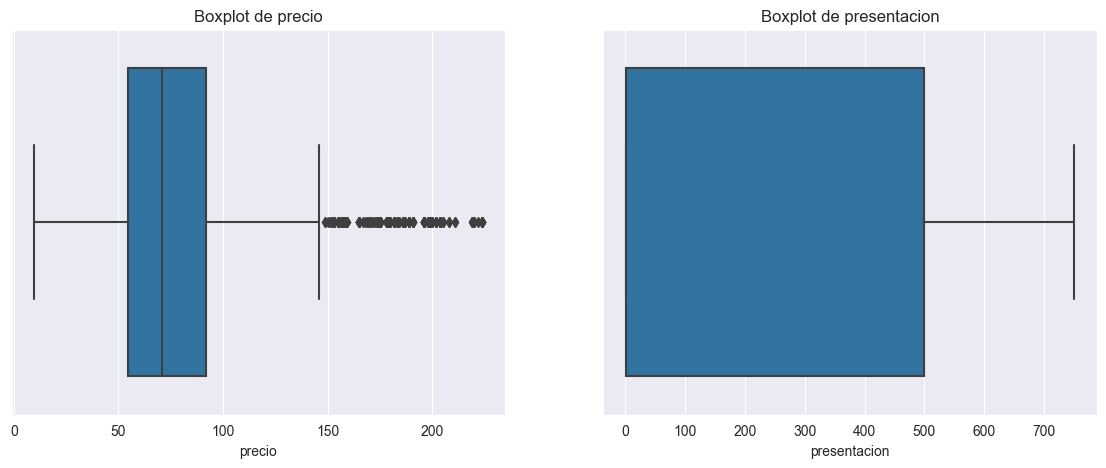

In [32]:
fig, ax = plt.subplots(1,2,figsize=(14,5))

ax[0].set_title(f"Boxplot de precio")
sns.boxplot(data = precios_claros, x = "precio",  ax = ax[0])

ax[1].set_title(f"Boxplot de presentacion")
sns.boxplot(data = precios_claros, x = "presentacion",  ax = ax[1])

Filtramos el dataset para evaluar estos pecios y al hacerlo podemos ver que en realidad se trata de productos con precio mas elevado porque su presentacion tambien es mayor. Es por ello que tomaremos la decision de no eliminarlos.

In [33]:
precios_claros[precios_claros.precio >= 125].sort_values(ascending = True, by = ["presentacion", "precio"])

,categoria,marca,presentacion,precio,tipo_cadena,cadena,unidad_presentacion
2944,Arroz,GALLO,1.0,134.0,Hipermercado,Hipermercado Carrefour,kg
2941,Arroz,GALLO,1.0,135.0,Hipermercado,Hipermercado Carrefour,kg
3061,Arroz,GALLO,1.0,135.0,Supermercado,Disco,kg
3071,Arroz,GALLO,1.0,135.0,Hipermercado,Hipermercado Carrefour,kg
2948,Arroz,GALLO,1.0,146.0,Hipermercado,Hipermercado Carrefour,kg
...,...,...,...,...,...,...,...
4165,Harinas,MAIZENA,520.0,139.0,Hipermercado,Hipermercado Carrefour,gr
4229,Harinas,MAIZENA,520.0,139.0,Supermercado,Hipermercado Carrefour,gr
4163,Harinas,MAIZENA,520.0,140.0,Hipermercado,Hipermercado Carrefour,gr
4166,Harinas,MAIZENA,520.0,143.0,Hipermercado,Hipermercado Carrefour,gr


In [34]:
precios_claros.to_csv("data/clean_precios_claros.csv", index=False)

## 3 - ANALISIS INICIAL

Para comenzar haremos un analisis de los precios de los productos seleccionados.

In [35]:
precios_claros

,categoria,marca,presentacion,precio,tipo_cadena,cadena,unidad_presentacion
0,Agua,VILLAVICENCIO,1.5,70.00,Hipermercado,Hipermercado Carrefour,lt
1,Agua,VILLAVICENCIO,1.5,85.00,Supermercado,Hipermercado Carrefour,lt
2,Agua,VILLAVICENCIO,1.5,69.00,Supermercado,Hipermercado Carrefour,lt
3,Agua,VILLAVICENCIO,1.5,75.50,Hipermercado,Hipermercado Carrefour,lt
4,Agua,VILLAVICENCIO,1.5,73.00,Hipermercado,Hipermercado Carrefour,lt
...,...,...,...,...,...,...,...
14172,Pastas,LA SALTEÑA,400.0,79.99,Supermercado,Supermercados DIA,gr
14173,Pastas,LA SALTEÑA,400.0,75.00,Autoservicio,Supermercados DIA,gr
14199,Pastas,LA SALTEÑA,400.0,77.00,Supermercado,Disco,gr
14200,Pastas,LA SALTEÑA,400.0,75.00,Supermercado,Disco,gr


In [36]:
print("Cantidad de registros por cadena:")
precios_claros.cadena.value_counts()

Cantidad de registros por cadena:


Hipermercado Carrefour    1267
Disco                      243
Supermercados DIA          219
Name: cadena, dtype: int64

In [37]:
dia = precios_claros[precios_claros.cadena == "Supermercados DIA"]
disco = precios_claros[precios_claros.cadena == "Disco"]
carrefour = precios_claros[precios_claros.cadena == "Hipermercado Carrefour"]

In [38]:
print(f"La marca con mayor cantidad de registros en dia es {dia.marca.mode()[0]}, en carrefour tambien es {carrefour.marca.mode()[0]} y en disco es {disco.marca.mode()[0]}.")

La marca con mayor cantidad de registros en dia es LUCCHETTI, en carrefour tambien es LUCCHETTI y en disco es MATARAZZO.


In [39]:
print(f"En dia hay mayor cantidad de productos pertenecientes a la categoria {dia.categoria.mode()[0]}, en carrefour a {carrefour.categoria.mode()[0]} y en disco tambien a {disco.categoria.mode()[0]}.")

En dia hay mayor cantidad de productos pertenecientes a la categoria Agua, en carrefour a Pastas y en disco tambien a Pastas.


In [40]:
print(f"Los productos en dia en su mayoria pertenecen al tipo de cadena {dia.tipo_cadena.mode()[0]}, en carrefour a {carrefour.tipo_cadena.mode()[0]} y en disco tambien a {disco.tipo_cadena.mode()[0]}.")

Los productos en dia en su mayoria pertenecen al tipo de cadena Supermercado, en carrefour a Hipermercado y en disco tambien a Supermercado.


A continuacion se observa los precios promedio por cadena. Se puede ver que en la mayoria de categorias se cumple nuestra prediccion de que los precios son mas baratos en dia, seguidos de carrefour y ultimo por disco. Sin embargo, en la categoria agua dia es la cadena con promedio de precio mas elevado.

In [41]:
dia.groupby("categoria").precio.mean().round(2)

categoria
Agua       83.42
Arroz      84.67
Harinas    71.89
Leche      42.46
Pastas     76.04
Name: precio, dtype: float64

In [42]:
carrefour.groupby("categoria").precio.mean().round(2)

categoria
Agua       78.85
Arroz      94.69
Harinas    70.24
Leche      45.04
Pastas     93.63
Name: precio, dtype: float64

In [43]:
disco.groupby("categoria").precio.mean().round(2)

categoria
Agua        80.03
Arroz      102.79
Harinas     75.07
Leche       58.88
Pastas      93.47
Name: precio, dtype: float64

Como se puede ver, Agua es la categoria con mayor cantidad de marcas, y carreforur la caadena con mayor variedad de marcas de la canasta basica


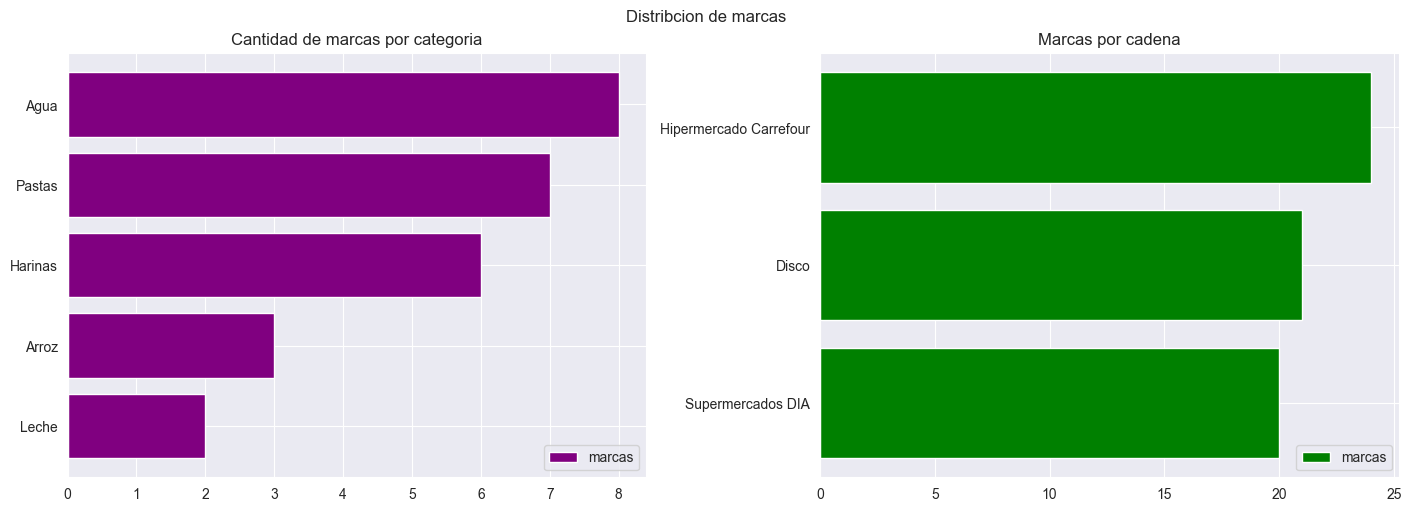

In [44]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(14,5), constrained_layout = True)

por_categoria = (precios_claros.groupby('categoria').marca.nunique()).sort_values().reset_index()
por_cadena = (precios_claros.groupby('cadena').marca.nunique()).sort_values().reset_index()

axs[0].barh(por_categoria.categoria , por_categoria.marca, label= "marcas", color = "purple")
axs[0].set_title('Cantidad de marcas por categoria')
axs[0].legend()
# Second subplot
axs[1].barh(por_cadena.cadena, por_cadena.marca, label= "marcas", color = "green")
axs[1].set_title("Marcas por cadena")
axs[1].legend()
# Global figure methods
plt.suptitle('Distribcion de marcas')
print(f"Como se puede ver, Agua es la categoria con mayor cantidad de marcas, y carreforur la caadena con mayor variedad de marcas de la canasta basica")
plt.show()


A continuacion se agruparon datos por unidad de presentacion y por categoria para ver el promedio de presentacion del envase. Podemos ver que en centimetros cubicos y en lt se encuentran las categorias Agua y Leche, y las restantes se distribuyen en kg y gr. Ademas se puede ver que los promedios en gr y en cc son mucho mayores a los que estan medidos en kg y lt, y esto se da porque estas dos utlimas  son unidades de medida mayores que las dos anteriores.

In [45]:
precios_claros.groupby(["unidad_presentacion", "categoria"]).presentacion.mean().round(2)

unidad_presentacion  categoria
cc                   Agua         500.00
                     Leche        200.00
gr                   Arroz        464.71
                     Harinas      495.58
                     Pastas       486.87
kg                   Arroz          1.00
                     Harinas        1.00
lt                   Agua           2.84
                     Leche          1.00
Name: presentacion, dtype: float64

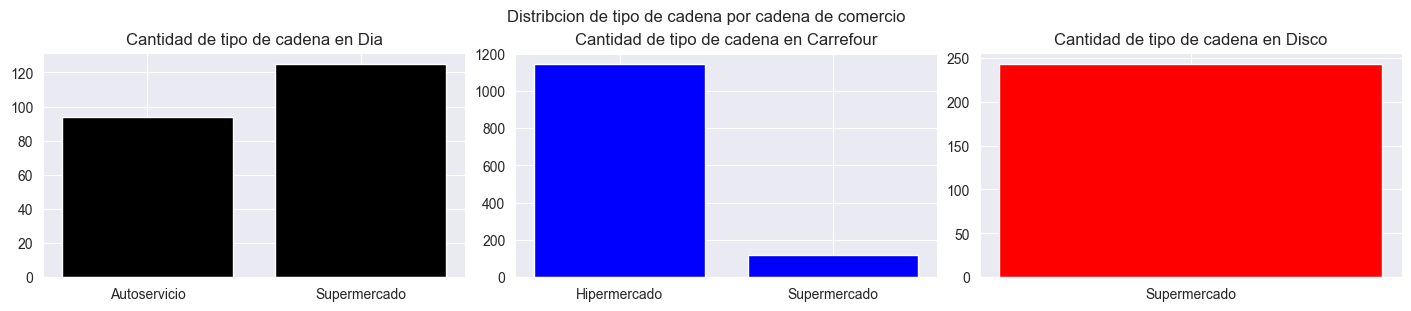

Se puede ver que Supermerados dia tiene autoservicios y en su mayoria supermercados, Carrefour en su mayoria Hipermercados pero tambien cuenta con supermercados, mientras que en Disco son todos supermercados


In [46]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 3, figsize=(14,3), constrained_layout = True)

dia_plt = dia.groupby("tipo_cadena").count().reset_index()
disco_plt = disco.groupby("tipo_cadena").count().reset_index()
carrefour_plt = carrefour.groupby("tipo_cadena").count().reset_index()

axs[0].bar(dia_plt.tipo_cadena , dia_plt.cadena, color = "black")
axs[0].set_title(f'Cantidad de tipo de cadena en Dia')
# Second subplot
axs[1].bar(carrefour_plt.tipo_cadena , carrefour_plt.cadena, color = "blue")
axs[1].set_title(f'Cantidad de tipo de cadena en Carrefour')

axs[2].bar(disco_plt.tipo_cadena , disco_plt.cadena, color = "red")
axs[2].set_title(f'Cantidad de tipo de cadena en Disco')
# Global figure methods
plt.suptitle('Distribcion de tipo de cadena por cadena de comercio')
plt.savefig("data/plot_tipo_cadena.png")
plt.show()
print(f"Se puede ver que Supermerados dia tiene autoservicios y en su mayoria supermercados, Carrefour en su mayoria Hipermercados pero tambien cuenta con supermercados, mientras que en Disco son todos supermercados")

## 4 -  ESCALADO

Aplicamos el escalado a las variables con el objetivo de estandarizarlas, es decir, de ponerlas en el mismo rango de valores para que sean comparables entre si.

In [47]:
precios_claros.dtypes

categoria               object
marca                   object
presentacion           float64
precio                 float64
tipo_cadena             object
cadena                  object
unidad_presentacion     object
dtype: object

In [48]:
numericas = precios_claros.select_dtypes(exclude=['object']).columns

print("Hacer un escalado a la variables: ")
for variable in numericas:
    print(f"\t- {variable}")

Hacer un escalado a la variables: 
	- presentacion
	- precio


### Variable `presentacion`

Como se ve en los graficos, esta variable no tiene una distribucion normaly esto se da porque los productos estan en diferentes unidades de medida. Por ello, previo a escalar la variable, podemos pasar los cc a lt y los gr a kg.

<AxesSubplot: title={'center': 'Boxplot depresentacion'}, xlabel='presentacion'>

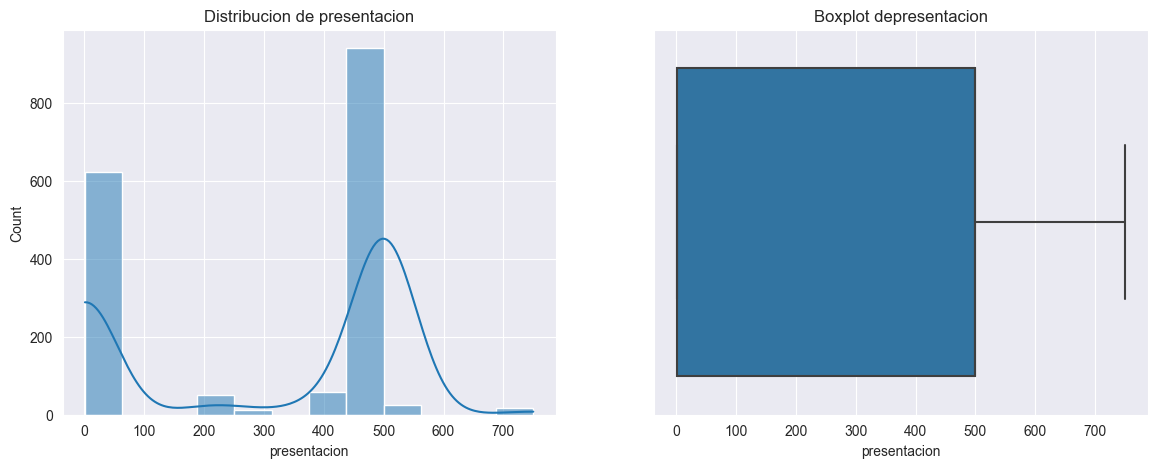

In [49]:
variable = 'presentacion'

fig, ax = plt.subplots(1,2,figsize=(14,5))

ax[0].set_title(f"Distribucion de {variable}")
sns.histplot(data = precios_claros, x = f"{variable}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot de{variable}")

sns.boxplot(data = precios_claros, x = f"{variable}", ax=ax[1])

In [50]:
precios_claros.presentacion.describe().round(2)

count    1729.00
mean      310.05
std       238.63
min         1.00
25%         1.50
50%       500.00
75%       500.00
max       750.00
Name: presentacion, dtype: float64

Como 1 litro equivale a 1000 centimetros cubicos y 1 kilo gramo equivale a 1000 gramos, dividimos la presentacion de aquellos productos que esten medidos en cc y gr por 1000 y cambiamos su unidad de medida.

In [51]:
precios_claros.loc[precios_claros['unidad_presentacion'] == "cc", 'presentacion'] = precios_claros.presentacion / 1000
precios_claros['unidad_presentacion'] = precios_claros['unidad_presentacion'].str.replace("cc", "lt", regex = False)

In [52]:
precios_claros.loc[precios_claros['unidad_presentacion'] == "gr", 'presentacion'] = precios_claros.presentacion / 1000
precios_claros['unidad_presentacion'] = precios_claros['unidad_presentacion'].str.replace("gr", "kg", regex = False)

Vemos que ahora las unicas unidades de medida son litros y kg.

In [53]:
precios_claros.unidad_presentacion.value_counts(dropna = False)

kg    1203
lt     526
Name: unidad_presentacion, dtype: int64

<AxesSubplot: title={'center': 'Boxplot depresentacion'}, xlabel='presentacion'>

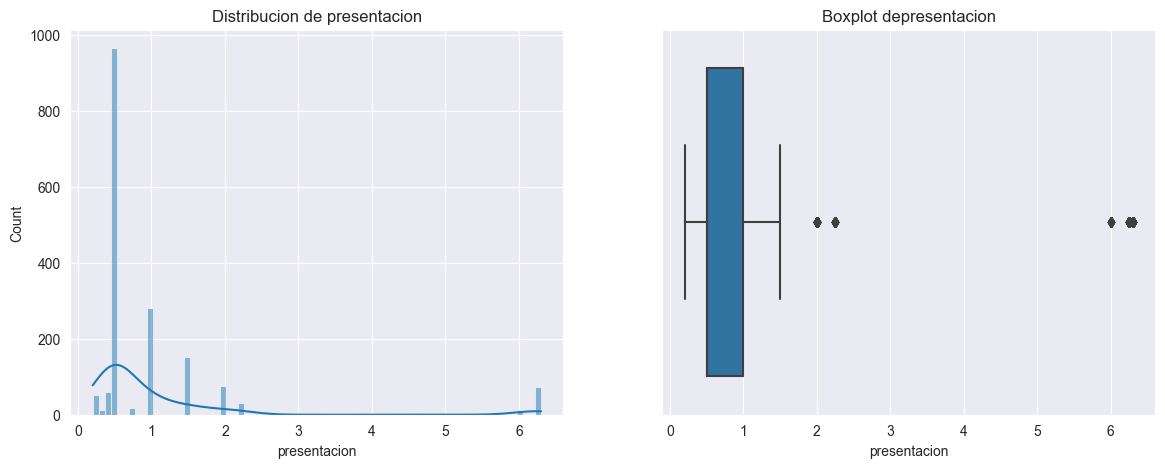

In [54]:
variable = 'presentacion'

fig, ax = plt.subplots(1,2,figsize=(14,5))

ax[0].set_title(f"Distribucion de {variable}")
sns.histplot(data = precios_claros, x = f"{variable}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot de{variable}")

sns.boxplot(data = precios_claros, x = f"{variable}", ax=ax[1])

En esta instancia se puede ver nuevamente que los que parece ser malas imputaciones es porque el producto es de mayor presentacion.

In [55]:
precios_claros[precios_claros.presentacion > 3]

,categoria,marca,presentacion,precio,tipo_cadena,cadena,unidad_presentacion
880,Agua,KIN,6.00,125.00,Hipermercado,Hipermercado Carrefour,lt
886,Agua,KIN,6.00,121.49,Autoservicio,Supermercados DIA,lt
887,Agua,KIN,6.00,123.39,Autoservicio,Supermercados DIA,lt
888,Agua,KIN,6.00,93.00,Supermercado,Supermercados DIA,lt
891,Agua,KIN,6.00,125.00,Supermercado,Disco,lt
...,...,...,...,...,...,...,...
1345,Agua,VILLA DEL SUR,6.25,175.00,Hipermercado,Hipermercado Carrefour,lt
1384,Agua,VILLA DEL SUR,6.25,197.99,Supermercado,Supermercados DIA,lt
1385,Agua,VILLA DEL SUR,6.25,198.99,Autoservicio,Supermercados DIA,lt
1386,Agua,VILLA DEL SUR,6.25,175.00,Autoservicio,Supermercados DIA,lt


Ahora si le podemos aplicar el escalador.

In [56]:
from sklearn.preprocessing import RobustScaler

escalador = RobustScaler()

variable = 'presentacion'

precios_claros[[variable]] = escalador.fit_transform(precios_claros[[variable]])

print(f"Como los datos en {variable} tienen outliers, imputamos el RobustScaler, que escala los valores restandole la mediana y dividiendolo por el rango intercuartil")

precios_claros.head()

Como los datos en presentacion tienen outliers, imputamos el RobustScaler, que escala los valores restandole la mediana y dividiendolo por el rango intercuartil


,categoria,marca,presentacion,precio,tipo_cadena,cadena,unidad_presentacion
0,Agua,VILLAVICENCIO,2.0,70.0,Hipermercado,Hipermercado Carrefour,lt
1,Agua,VILLAVICENCIO,2.0,85.0,Supermercado,Hipermercado Carrefour,lt
2,Agua,VILLAVICENCIO,2.0,69.0,Supermercado,Hipermercado Carrefour,lt
3,Agua,VILLAVICENCIO,2.0,75.5,Hipermercado,Hipermercado Carrefour,lt
4,Agua,VILLAVICENCIO,2.0,73.0,Hipermercado,Hipermercado Carrefour,lt


### Variable `precio`

Al igual que en el caso anterior, aplicaremos el robust scaler.

<AxesSubplot: title={'center': 'Boxplot deprecio'}, xlabel='precio'>

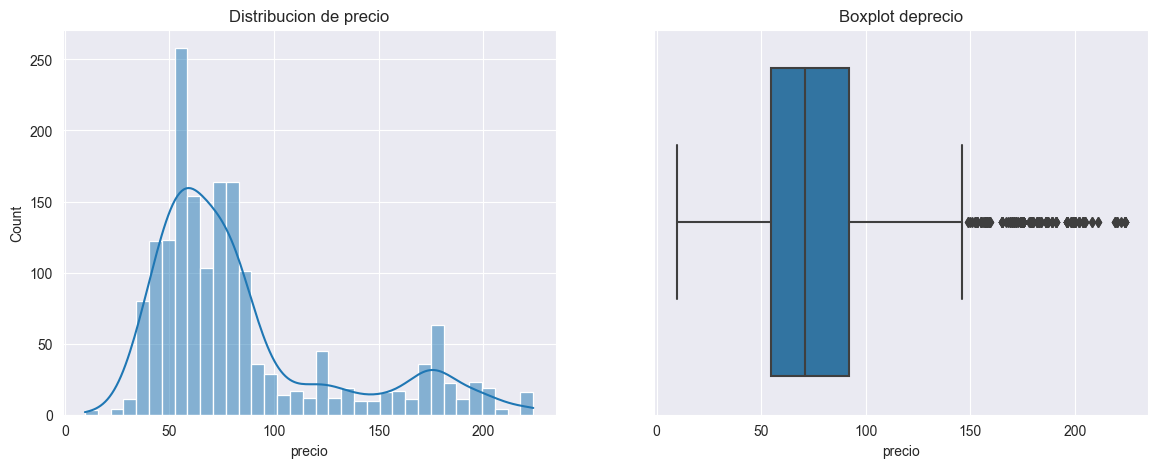

In [57]:
variable = 'precio'

fig, ax = plt.subplots(1,2,figsize=(14,5))

ax[0].set_title(f"Distribucion de {variable}")
sns.histplot(data = precios_claros, x = f"{variable}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot de{variable}")

sns.boxplot(data = precios_claros, x = f"{variable}", ax=ax[1])

In [58]:
from sklearn.preprocessing import RobustScaler

escalador = RobustScaler()

variable = 'precio'

precios_claros[[variable]] = escalador.fit_transform(precios_claros[[variable]])

print(f"Como los datos en {variable} tienen outliers, imputamos el RobustScaler, que escala los valores restandole la mediana y dividiendolo por el rango intercuartil")

precios_claros.head()

Como los datos en precio tienen outliers, imputamos el RobustScaler, que escala los valores restandole la mediana y dividiendolo por el rango intercuartil


,categoria,marca,presentacion,precio,tipo_cadena,cadena,unidad_presentacion
0,Agua,VILLAVICENCIO,2.0,-0.026846,Hipermercado,Hipermercado Carrefour,lt
1,Agua,VILLAVICENCIO,2.0,0.375839,Supermercado,Hipermercado Carrefour,lt
2,Agua,VILLAVICENCIO,2.0,-0.053691,Supermercado,Hipermercado Carrefour,lt
3,Agua,VILLAVICENCIO,2.0,0.120805,Hipermercado,Hipermercado Carrefour,lt
4,Agua,VILLAVICENCIO,2.0,0.053691,Hipermercado,Hipermercado Carrefour,lt


## 5 -  ENCODING

In [59]:
categoricas = precios_claros.select_dtypes(exclude=['float', 'integer']).columns
print("Hacer un encoding a la variables: ")
for variable in categoricas:
    print(f"\t- {variable}")

Hacer un encoding a la variables: 
	- categoria
	- marca
	- tipo_cadena
	- cadena
	- unidad_presentacion


### Variable `categoria`

Lo que hace este bloque de codigo expandir la columna inicial a columnas binarias para cada categoria adentro de la variable, asignandoles 1 y 0 dependiendo de si el producto cuenta con la categoria o no. Mediante este codigo pudimos automatizar la busqueda de las diferentes categorias y la asignacion del nombre de la columna. Se repite el codigo para todas las variables categoricas menos al target.

In [60]:
categorias = precios_claros.categoria.unique()
print("Categorias unicas: ")
for categoria in categorias:
    print(f"\t- {categoria}")

Categorias unicas: 
	- Agua
	- Arroz
	- Harinas
	- Leche
	- Pastas


In [61]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)

df = precios_claros
variable = 'categoria'

ohe.fit(df[[variable]])

display(ohe.categories_)

display(ohe.get_feature_names_out())

variable_encoded = ohe.transform(df[[variable]])

df[ohe.get_feature_names_out()] = variable_encoded

df.drop(columns = variable, inplace = True)

print(f"Como {variable} es una variable multicategorica, creo una columna binaria para cada categoria")

df.head()

[array(['Agua', 'Arroz', 'Harinas', 'Leche', 'Pastas'], dtype=object)]

array(['categoria_Agua', 'categoria_Arroz', 'categoria_Harinas',
       'categoria_Leche', 'categoria_Pastas'], dtype=object)

Como categoria es una variable multicategorica, creo una columna binaria para cada categoria


,marca,presentacion,precio,tipo_cadena,cadena,unidad_presentacion,categoria_Agua,categoria_Arroz,categoria_Harinas,categoria_Leche,categoria_Pastas
0,VILLAVICENCIO,2.0,-0.026846,Hipermercado,Hipermercado Carrefour,lt,1.0,0.0,0.0,0.0,0.0
1,VILLAVICENCIO,2.0,0.375839,Supermercado,Hipermercado Carrefour,lt,1.0,0.0,0.0,0.0,0.0
2,VILLAVICENCIO,2.0,-0.053691,Supermercado,Hipermercado Carrefour,lt,1.0,0.0,0.0,0.0,0.0
3,VILLAVICENCIO,2.0,0.120805,Hipermercado,Hipermercado Carrefour,lt,1.0,0.0,0.0,0.0,0.0
4,VILLAVICENCIO,2.0,0.053691,Hipermercado,Hipermercado Carrefour,lt,1.0,0.0,0.0,0.0,0.0


### Variable `marca`

In [62]:
marcas = precios_claros.marca.unique()
print("Marcas unicas: ")
for marca in marcas:
    print(f"\t- {marca}")

Marcas unicas: 
	- VILLAVICENCIO
	- SER
	- BONAQUA
	- ECO DE LOS ANDES
	- KIN
	- NESTLÉ
	- VILLA DEL SUR
	- GLACIAR
	- GALLO
	- MOLINOS ALA
	- LUCCHETTI
	- MAIZENA
	- PUREZA
	- CAÑUELAS
	- FAVORITA
	- QUAKER
	- ARCOR
	- LA SERENÍSIMA
	- ARMONÍA
	- GIACOMO
	- DON VICENTE
	- MATARAZZO
	- KNORR
	- LA SALTEÑA


In [63]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)

df = precios_claros
variable = 'marca'

ohe.fit(df[[variable]])

display(ohe.categories_)

display(ohe.get_feature_names_out())

variable_encoded = ohe.transform(df[[variable]])

df[ohe.get_feature_names_out()] = variable_encoded

df.drop(columns = variable, inplace = True)

print(f"Como {variable} es una variable multicategorica, creo una columna binaria para cada categoria")

df.head()

[array(['ARCOR', 'ARMONÍA', 'BONAQUA', 'CAÑUELAS', 'DON VICENTE',
        'ECO DE LOS ANDES', 'FAVORITA', 'GALLO', 'GIACOMO', 'GLACIAR',
        'KIN', 'KNORR', 'LA SALTEÑA', 'LA SERENÍSIMA', 'LUCCHETTI',
        'MAIZENA', 'MATARAZZO', 'MOLINOS ALA', 'NESTLÉ', 'PUREZA',
        'QUAKER', 'SER', 'VILLA DEL SUR', 'VILLAVICENCIO'], dtype=object)]

array(['marca_ARCOR', 'marca_ARMONÍA', 'marca_BONAQUA', 'marca_CAÑUELAS',
       'marca_DON VICENTE', 'marca_ECO DE LOS ANDES', 'marca_FAVORITA',
       'marca_GALLO', 'marca_GIACOMO', 'marca_GLACIAR', 'marca_KIN',
       'marca_KNORR', 'marca_LA SALTEÑA', 'marca_LA SERENÍSIMA',
       'marca_LUCCHETTI', 'marca_MAIZENA', 'marca_MATARAZZO',
       'marca_MOLINOS ALA', 'marca_NESTLÉ', 'marca_PUREZA',
       'marca_QUAKER', 'marca_SER', 'marca_VILLA DEL SUR',
       'marca_VILLAVICENCIO'], dtype=object)

Como marca es una variable multicategorica, creo una columna binaria para cada categoria


,presentacion,precio,tipo_cadena,cadena,unidad_presentacion,categoria_Agua,categoria_Arroz,categoria_Harinas,categoria_Leche,categoria_Pastas,...,marca_LUCCHETTI,marca_MAIZENA,marca_MATARAZZO,marca_MOLINOS ALA,marca_NESTLÉ,marca_PUREZA,marca_QUAKER,marca_SER,marca_VILLA DEL SUR,marca_VILLAVICENCIO
0,2.0,-0.026846,Hipermercado,Hipermercado Carrefour,lt,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2.0,0.375839,Supermercado,Hipermercado Carrefour,lt,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2.0,-0.053691,Supermercado,Hipermercado Carrefour,lt,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2.0,0.120805,Hipermercado,Hipermercado Carrefour,lt,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2.0,0.053691,Hipermercado,Hipermercado Carrefour,lt,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Variable `tipo_cadena`

In [64]:
tipos_cadenas = precios_claros.tipo_cadena.unique()
print("Tipos de cadena unicas: ")
for tipo_cadena in tipos_cadenas:
    print(f"\t- {tipo_cadena}")

Tipos de cadena unicas: 
	- Hipermercado
	- Supermercado
	- Autoservicio


In [65]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)

df = precios_claros
variable = 'tipo_cadena'

ohe.fit(df[[variable]])

display(ohe.categories_)

display(ohe.get_feature_names_out())

variable_encoded = ohe.transform(df[[variable]])

df[ohe.get_feature_names_out()] = variable_encoded

df.drop(columns = variable, inplace = True)

print(f"Como {variable} es una variable multicategorica, creo una columna binaria para cada categoria")

df.head()

[array(['Autoservicio', 'Hipermercado', 'Supermercado'], dtype=object)]

array(['tipo_cadena_Autoservicio', 'tipo_cadena_Hipermercado',
       'tipo_cadena_Supermercado'], dtype=object)

Como tipo_cadena es una variable multicategorica, creo una columna binaria para cada categoria


,presentacion,precio,cadena,unidad_presentacion,categoria_Agua,categoria_Arroz,categoria_Harinas,categoria_Leche,categoria_Pastas,marca_ARCOR,...,marca_MOLINOS ALA,marca_NESTLÉ,marca_PUREZA,marca_QUAKER,marca_SER,marca_VILLA DEL SUR,marca_VILLAVICENCIO,tipo_cadena_Autoservicio,tipo_cadena_Hipermercado,tipo_cadena_Supermercado
0,2.0,-0.026846,Hipermercado Carrefour,lt,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,2.0,0.375839,Hipermercado Carrefour,lt,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,2.0,-0.053691,Hipermercado Carrefour,lt,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,2.0,0.120805,Hipermercado Carrefour,lt,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,2.0,0.053691,Hipermercado Carrefour,lt,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


### Variable `unidad_presentacion`
En este caso, como la variable ya es binaria, no es necesari expandirla, podemos hacer el encoding en la misma columna, asignandole 0 a los lt y 1 a los kg.

In [66]:
unidades_presentacion = precios_claros.unidad_presentacion.unique()
print("Unidades de presentacion unicas: ")
for unidad_presentacion in unidades_presentacion:
    print(f"\t- {unidad_presentacion}")

Unidades de presentacion unicas: 
	- lt
	- kg


In [67]:
hot_encoder = OneHotEncoder(sparse = False, drop = 'if_binary', categories=[['lt', 'kg']]) #lt va a ser cero y kg va a ser 1

df = precios_claros
variable = 'unidad_presentacion'

df[variable] = hot_encoder.fit_transform(df[[variable]])

print("Como tengo una columna con dos categorias, hago el one-hot pero tranformando la columna en binaria")

df.head()

Como tengo una columna con dos categorias, hago el one-hot pero tranformando la columna en binaria


,presentacion,precio,cadena,unidad_presentacion,categoria_Agua,categoria_Arroz,categoria_Harinas,categoria_Leche,categoria_Pastas,marca_ARCOR,...,marca_MOLINOS ALA,marca_NESTLÉ,marca_PUREZA,marca_QUAKER,marca_SER,marca_VILLA DEL SUR,marca_VILLAVICENCIO,tipo_cadena_Autoservicio,tipo_cadena_Hipermercado,tipo_cadena_Supermercado
0,2.0,-0.026846,Hipermercado Carrefour,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,2.0,0.375839,Hipermercado Carrefour,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,2.0,-0.053691,Hipermercado Carrefour,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,2.0,0.120805,Hipermercado Carrefour,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,2.0,0.053691,Hipermercado Carrefour,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


### Target `cadena`
Ahora aplicamos el Label Encoder a tipo_cadena, que es nuestro target. Siendo 0 Disco, 1 Hipermercados Carrefour y 2 Supermercados Dia.

In [68]:
cadenas = precios_claros.cadena.unique()
print("Unidades de presentacion unicas: ")
for cadena in cadenas:
    print(f"\t- {cadena}")

Unidades de presentacion unicas: 
	- Hipermercado Carrefour
	- Supermercados DIA
	- Disco


In [69]:
from sklearn.preprocessing import LabelEncoder

df = precios_claros
variable = 'cadena'

df[variable] = LabelEncoder().fit_transform(df[variable])
df.head()

,presentacion,precio,cadena,unidad_presentacion,categoria_Agua,categoria_Arroz,categoria_Harinas,categoria_Leche,categoria_Pastas,marca_ARCOR,...,marca_MOLINOS ALA,marca_NESTLÉ,marca_PUREZA,marca_QUAKER,marca_SER,marca_VILLA DEL SUR,marca_VILLAVICENCIO,tipo_cadena_Autoservicio,tipo_cadena_Hipermercado,tipo_cadena_Supermercado
0,2.0,-0.026846,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,2.0,0.375839,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,2.0,-0.053691,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,2.0,0.120805,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,2.0,0.053691,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


## 6 - MODELO
Hacemos un primer modelo de regresion logistica mediante cross validation, ajustando el parametro para obtener un mejor accuracy. Lo que hace es:

- divide el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba.
- ajusta el modelo, hace predicciones y calcula una puntuación
- repite el proceso 10 veces en total
- genera el promedio de las 10 puntuaciones

In [70]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression

X = precios_claros.drop(columns = "cadena")
y = precios_claros["cadena"]

model = LogisticRegression(max_iter=1000)


cv_results = cross_validate(model, X, y, cv=10)

base_model_score = cv_results['test_score'].mean()
print(f" En este primer modelo se obtuvo un accuracy de {round(base_model_score, 4)}")

 En este primer modelo se obtuvo un accuracy de 0.8005


Ahora aplicamos el `train_test_split` y le indicamos el tamaño que queremos para que se entrene el modelo y se prube, en este caso el tamaño de prueba es 0.3, por lo tanto el de entrenamiento es de 0.7

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

train_test = model.score(X_test, y_test)

print(f"Realizamos un train y test mara mejorar nuestro modelo y obtuvimos un score de: {round(train_test, 4)}, pudiendo ver que mejoro nuestro modelo en {round(train_test - base_model_score, 4)}")

Realizamos un train y test mara mejorar nuestro modelo y obtuvimos un score de: 0.8343, pudiendo ver que mejoro nuestro modelo en 0.0338


/Users/usuario/PycharmProjects/pythonProject5/POO/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Repetimos el `train_test_split` anterior, pero en esta instancia estratificamos nuestro target, es decir, buscamos que cada conjunto contenga aproximadamente el mismo porcentaje de muestras de cada clase objetivo que el conjunto completo.

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 10)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

stratify_score = model.score(X_test, y_test)

print(f'Estratificamos nuestra variable target obteniendo un accuracy {round(stratify_score, 4)}, mejorado un {round(stratify_score - train_test, 4)} con respecto al anterior')

Estratificamos nuestra variable target obteniendo un accuracy 0.8536, mejorado un 0.0193 con respecto al anterior


/Users/usuario/PycharmProjects/pythonProject5/POO/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Utilizamos la funcion para establecer cuales son las variables con mayor influencia en nuestro modelo. A estas variables les llamaremos variables "fuertes", y mediante un umbral seleccionaremos aquellas que nos quedaremos en nuestro modelo.

In [73]:
from sklearn.model_selection import cross_val_score
from sklearn.inspection import permutation_importance

print(f"Antes de la permutacion, el score del model es: {round(stratify_score,4)}")

model = LogisticRegression().fit(X,y)
permutation_score = permutation_importance(model, X, y, n_repeats=100)
importance_df = pd.DataFrame(np.vstack((X.columns,
                                        permutation_score.importances_mean)).T,
                            columns = ['feature','feature_importance'])

print("Despues de la permutacion de variables, asi decrece el score en terminos de variables:")
importance_df = importance_df.sort_values(by="feature_importance", ascending = False)
importance_df

/Users/usuario/PycharmProjects/pythonProject5/POO/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Antes de la permutacion, el score del model es: 0.8536
Despues de la permutacion de variables, asi decrece el score en terminos de variables:


,feature,feature_importance
33,tipo_cadena_Hipermercado,0.105599
34,tipo_cadena_Supermercado,0.045188
32,tipo_cadena_Autoservicio,0.039832
1,precio,0.00878
0,presentacion,0.003702
21,marca_LA SERENÍSIMA,0.003569
3,categoria_Agua,0.003493
7,categoria_Pastas,0.002822
5,categoria_Harinas,0.002337
23,marca_MAIZENA,0.002105


Pasamos al tipo de dato numerico para poder graficar.

In [74]:
importance_df = importance_df.set_index("feature")
importance_df.feature_importance = pd.to_numeric(importance_df.feature_importance)

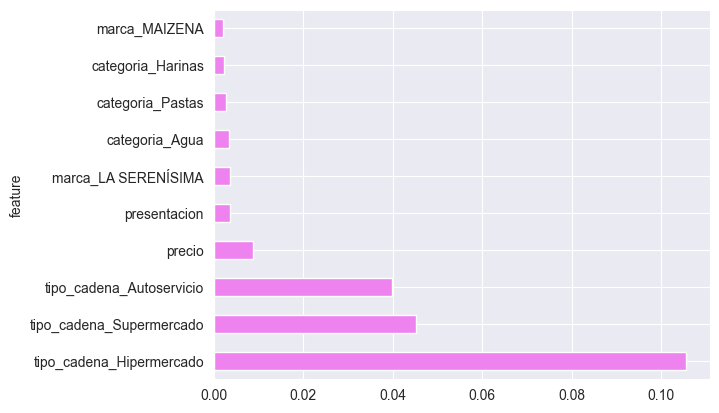

Vemos que Hipermercado es la mas importante, seguida de Supermercado y Autoservicio


In [75]:
importance_df.feature_importance.nlargest(10).plot(kind='barh', color = "violet")
plt.show()
print("Vemos que Hipermercado es la mas importante, seguida de Supermercado y Autoservicio")

In [76]:
importance_df = importance_df.reset_index()

Indicamos el umbral que buscamos en nuestro modelo.

In [77]:
threshold = 0.03

weak_features = importance_df[importance_df.feature_importance <= threshold]["feature"].values
print("Estas son las variables debiles del modelo segun el ubral establecido a criterio para poder elevar el score:")
weak_features

Estas son las variables debiles del modelo segun el ubral establecido a criterio para poder elevar el score:


array(['precio', 'presentacion', 'marca_LA SERENÍSIMA', 'categoria_Agua',
       'categoria_Pastas', 'categoria_Harinas', 'marca_MAIZENA',
       'marca_KIN', 'unidad_presentacion', 'marca_LUCCHETTI',
       'marca_LA SALTEÑA', 'marca_ARMONÍA', 'marca_BONAQUA',
       'categoria_Leche', 'marca_CAÑUELAS', 'marca_VILLA DEL SUR',
       'marca_GALLO', 'marca_MATARAZZO', 'marca_SER', 'marca_PUREZA',
       'marca_VILLAVICENCIO', 'marca_NESTLÉ', 'marca_KNORR',
       'marca_DON VICENTE', 'marca_ECO DE LOS ANDES', 'marca_GLACIAR',
       'marca_MOLINOS ALA', 'marca_FAVORITA', 'marca_QUAKER',
       'marca_ARCOR', 'categoria_Arroz', 'marca_GIACOMO'], dtype=object)

Corremos el modelo con las variables fuertes:

In [78]:
X_strong_features = df.drop(columns=list(weak_features) + ["cadena"])
print(f"Las variables fuertes son:")
for feature in X_strong_features:
    print(f"\t- {feature}")

Las variables fuertes son:
	- tipo_cadena_Autoservicio
	- tipo_cadena_Hipermercado
	- tipo_cadena_Supermercado


In [79]:
model = LogisticRegression()

scores = cross_val_score(model, X_strong_features, y, cv = 10)
strong_model_score = scores.mean()

print(f"Antes de remover las variables el Accurracy es {round(base_model_score, 4)}")

print(f"El modelo entrenado con las variables fuertes dan un accuracy de {round(strong_model_score, 4)}, se puede ver que nuestro accuracy subio en {round(strong_model_score - stratify_score, 4)}")

Antes de remover las variables el Accurracy es 0.8005
El modelo entrenado con las variables fuertes dan un accuracy de 0.8571, se puede ver que nuestro accuracy subio en 0.0036


Aplicamos el train y test estratificado con las variables fuertes.

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X_strong_features, y, test_size = 0.3, stratify = y, random_state = 10)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

stratify_score_strong_features = model.score(X_test, y_test)

print(f'Haciendo el train y test estratificado con las variables fuertes el score obtenido fue de {round(stratify_score_strong_features, 4)}, mejorado un {round(stratify_score_strong_features - strong_model_score, 4)} con respecto al anterior.')

Haciendo el train y test estratificado con las variables fuertes el score obtenido fue de 0.8671, mejorado un 0.0099 con respecto al anterior.


### **Matriz de confusion**
Sabiendo que 0 es Disco, 1 Carrefour y 2 Dia, mediante la matriz de confusion podemos ver cuanto acierta nuestro modelo. Esto se ve en la diagonal de nuestra matriz, mientras qe los valores fuera de la diagonal representa las malas predicciones del modelo.

In [81]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, y_pred)

print(confusion)

[[ 73   0   0]
 [ 33 347   0]
 [ 36   0  30]]


Armamos un reporte de la clasificacion:
- Accuracy es el porcentaje de los aciertos en la prediccion con respecto a los datos reales.
- Recall habla de cuan completos son los resultados, es decir, del total de cada categoria observados, cuantos predijo correctamente de esa categoria.
- Precision habla de cuan utiles son los resultados, es decir, el total de cada categoria predecidos, cuantos predijo correctamente de esa categoria.

In [82]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      1.00      0.68        73
           1       1.00      0.91      0.95       380
           2       1.00      0.45      0.62        66

    accuracy                           0.87       519
   macro avg       0.84      0.79      0.75       519
weighted avg       0.93      0.87      0.87       519



Podemos ver que el precision y recall de la ultima categoria, Dia (2), son considerablemente menores al de las otras dos categorias de cadenas, Disco (0) y Carrefour (1).

/Users/usuario/PycharmProjects/pythonProject5/POO/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/usuario/PycharmProjects/pythonProject5/POO/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

Vemos el pico de accuracy del test score se alcanza con un training size de 300. Viendo la diferencia de las curvas podemos ver que a nuestro modelo le queda mucho por mejorar.


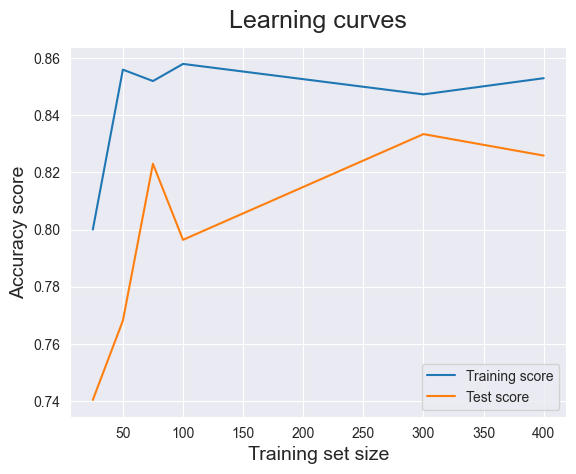

In [83]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np
train_sizes, train_scores, test_scores = learning_curve(estimator = LogisticRegression(max_iter=100),
                                                              X = X,
                                                              y = y,
                                                              train_sizes = [25,50,75,100,300,400],
                                                              cv = 10)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('Accuracy score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend()
print("Vemos el pico de accuracy del test score se alcanza con un training size de 300. Viendo la diferencia de las curvas podemos ver que a nuestro modelo le queda mucho por mejorar.")

### **Prediccion de una nueva instancia**
Si probamos el modelo usando solo las variables fuertes, podemos ver que solo utilizamos 3 variables: tipo_cadena_Autoservicio, tipo_cadena_Hipermercado y tipo_cadena_Supermercado, que surgen del OneHotEncoder de Tipo de cadena.

In [84]:
from sklearn.linear_model import LogisticRegression
from preprocess_tp import cadena

X = df.drop(columns=list(weak_features) + ["cadena"])
y = df["cadena"]
model_pred = LogisticRegression(max_iter=1000)
model_pred.fit(X, y)
X_new = pd.DataFrame({'tipo_cadena_Autoservicio' : [0], 'tipo_cadena_Hipermercado' : [1],
       'tipo_cadena_Supermercado': [0]})
prediction = model_pred.predict(X_new)[0]
print(f"Si nuestro producto es de la cadena Hipermercado, nuestro modelo predice que el producto pertenece a {prediction}, que es {cadena(prediction)}.")

Si nuestro producto es de la cadena Hipermercado, nuestro modelo predice que el producto pertenece a 1, que es Hipermercado Carrefour.


### **¿Tiene sentido el resultado?**

Si, el resultado tiene mucho sentido, ya que cuando realizamos este grafico en el analisis inicial pudimos ver que cada cadena tiene un tipo de cadena que destaca por sobre la otra y justamente estas son las variables fuertes de nuestro modelo. Es por eso que si le ponemos que es un Autoservicio el modelo va a devolver que es de dia, porque es la unica de las tres cadenas que tiene autoservicios, mientras que si le ponemos que Hipermercado va a devolver que es de Hipermercados carrefour, porque en su mayoria son de tipo Hipermercado, mientras que si ponemos supermercado, probablemente devuelva Disco porque es el unico tipo de cadena que tiene.

<img src="data/plot_tipo_cadena.png">

A continuacion probamos lo recientemente dicho:

In [85]:
from sklearn.linear_model import LogisticRegression
from preprocess_tp import cadena

X = df.drop(columns=list(weak_features) + ["cadena"])
y = df["cadena"]
model_pred = LogisticRegression(max_iter=1000)
model_pred.fit(X, y)
X_new = pd.DataFrame({'tipo_cadena_Autoservicio' : [0], 'tipo_cadena_Hipermercado' : [0],
       'tipo_cadena_Supermercado': [1]})
prediction = model_pred.predict(X_new)[0]
print(f"Si nuestro producto es de la cadena Supermercado, nuestro modelo predice que el producto pertenece a {prediction}, que es {cadena(prediction)}.")

Si nuestro producto es de la cadena Supermercado, nuestro modelo predice que el producto pertenece a 0, que es Disco.


In [86]:
from sklearn.linear_model import LogisticRegression
from preprocess_tp import cadena

X = df.drop(columns=list(weak_features) + ["cadena"])
y = df["cadena"]
model_pred = LogisticRegression(max_iter=1000)
model_pred.fit(X, y)
X_new = pd.DataFrame({'tipo_cadena_Autoservicio' : [1], 'tipo_cadena_Hipermercado' : [0],
       'tipo_cadena_Supermercado': [0]})
prediction = model_pred.predict(X_new)[0]
print(f"Si nuestro producto es de la cadena Autoservicio, nuestro modelo predice que el producto pertenece a {prediction}, que es {cadena(prediction)}.")

Si nuestro producto es de la cadena Autoservicio, nuestro modelo predice que el producto pertenece a 2, que es Supermercados Dia.


## CONCLUSION
### **¿Se cumple la hipótesis?**
La hipotesis establecida al comienzo resulto ser erronea ya que nuestro modelo termino descartando la variable de precio como variable relevante para nuestra prediccion, por lo que el precio no resulto tener una correlacion relevante con la cadena de comercio, por ende tampoco el poder adquisitivo de los consumidores. Al final resulto ser que la variable con mayor influencia fue la del tipo de cadena, ya que en cada cadena predominaba un tipo de cadena en el cual se basa nuestro modelo para predecir si pertenece a Supermercados Dia, Carrefour o Disco.